### Projeto final de Ciência dos Dados: Classificação de Pokémons a partir da sua cor e... 

##### Feito por:
Enrico Aloisi Nardi e Evandro Fontana Romeiro- 2º semestre de engenharia (Insper 2018)


##### Ideia geral do projeto:
A partir do que será apresentado, buscaremos tentar encontrar uma relação explícita entre os stats de um Pokémon, a sua cor e a sua categoria.

In [125]:
# Imports necessários para o projeto:
import os
import colorsys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from colorthief import ColorThief
from mpl_toolkits.mplot3d import Axes3D
from pandas import DataFrame as df
from sklearn import cluster
from pandas import ExcelWriter
from sklearn.cluster import KMeans
%matplotlib notebook

In [126]:
data= pd.read_csv('Pokemon.csv') #lendo o database baixado do kaggle 

#O bloco a seguir encontra-se comentado para que o comando criador.save() não interfira nas alterações feitas no excel pelo computador
#transformando o database csv em excel para poder eliminar incongruências entre a base de fotos e a de dados sobre os 
#Pokémons
# criador = ExcelWriter('Pokexcel.xlsx')                         
# data.to_excel(criador,'Sheet5')
# criador.save()  

'#transformando o database csv em excel para poder eliminar incongruências entre a base de fotos e a de dados sobre os \nPokémons'

# TESTE DO ALGORITMO COM OS POKÉMONS DA PRIMEIRA GERAÇÃO 

In [127]:
data_teste= pd.read_excel('Pokexcel2.xlsx') #lendo o database baixado do kaggle 
lis_cores_rgb = [] #lista que guardará os códigos RGB das cores predominantes em cada foto

lis_cores_hsv = [] #lista que guardará os códigos HSV das cores predominantes em cada foto

path = 'C:/Users/Enrico Aloisi Nardi/Desktop/Insper/SEGUNDO semestre/Ciência dos Dados/Projeto 3/Projeto-3--CDD/poketeste/'
arq_na_pasta= os.listdir(path)

for foto in arq_na_pasta:
    color_thief = ColorThief(path + foto)

    #recebendo a cor predominante de cada foto
    cor_predominante = color_thief.get_color(quality=1)
    lis_cores_rgb.append(cor_predominante)
    
    # Colocando a variável "cor predominante" numa função que converte um código de cores RGB em HSV e vice-versa.
    # Ela será utilzada para aumentar a 'precisão' da leitura da cor da foto feita pelo ColouThief, que entrega o resultado em RGB.
    # Com a conversão RGB-HSV buscamos reduzir confusões feitas pelo programa por conta de pequenas diferenças na cor lida.
    cor_predominante_hsv = colorsys.rgb_to_hsv(cor_predominante[0], cor_predominante[1], cor_predominante[2])
    
    lis_cores_hsv.append(cor_predominante_hsv)

In [128]:

data_teste['R'] = [x[0] for x in lis_cores_rgb]
data_teste['G'] = [x[1] for x in lis_cores_rgb]
data_teste['B'] = [x[2] for x in lis_cores_rgb]

data_teste.loc[data['Type 1'] == 'Water'   , "Categoria_Num"] = "0"
data_teste.loc[data['Type 1'] == 'Normal'  , "Categoria_Num"] = "1"
data_teste.loc[data['Type 1'] == 'Grass'   , "Categoria_Num"] = "2"
data_teste.loc[data['Type 1'] == 'Bug'     , "Categoria_Num"] = "3"
data_teste.loc[data['Type 1'] == 'Psychic' , "Categoria_Num"] = "4"
data_teste.loc[data['Type 1'] == 'Fire'    , "Categoria_Num"] = "5"
data_teste.loc[data['Type 1'] == 'Electric', "Categoria_Num"] = "6"
data_teste.loc[data['Type 1'] == 'Rock'    , "Categoria_Num"] = "7"
data_teste.loc[data['Type 1'] == 'Ghost'   , "Categoria_Num"] = "8"
data_teste.loc[data['Type 1'] == 'Dragon'  , "Categoria_Num"] = "9"
data_teste.loc[data['Type 1'] == 'Ground'  , "Categoria_Num"] = "10"
data_teste.loc[data['Type 1'] == 'Dark'    , "Categoria_Num"] = "11"
data_teste.loc[data['Type 1'] == 'Poison'  , "Categoria_Num"] = "12"
data_teste.loc[data['Type 1'] == 'Steel'   , "Categoria_Num"] = "13"
data_teste.loc[data['Type 1'] == 'Fighting', "Categoria_Num"] = "14"
data_teste.loc[data['Type 1'] == 'Ice'     , "Categoria_Num"] = "15"
data_teste.loc[data['Type 1'] == 'Fairy'   , "Categoria_Num"] = "16"
data_teste.loc[data['Type 1'] == 'Flying'  , "Categoria_Num"] = "17"

data2 = data_teste.drop(['Type 1','Type 2','Legendary','Name'], axis= 1)
data2.head(3)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,R,G,B,Categoria_Num
0,1,318,45,49,49,65,65,45,1,120,180,152,2
1,2,405,60,62,63,80,80,60,1,140,183,115,2
2,3,525,80,82,83,100,100,80,1,218,179,186,2


In [129]:
model= KMeans(n_clusters= 15) #o número de clusters foi definido a partir do número de dados categorias diferentes de Pokémons
                              #(15 no caso da primeira geração) 
model.fit(data2)
y_pred = model.predict(data2) #lista que guarda qual é o cluster ao qual pertence cada um dos pokemons

# APLICANDO O APRESENTADO NA BASE DE DADOS INTEIRA#

In [133]:
data= pd.read_excel('Pokexcel.xlsx') #lendo os dados já alterados e com o memso número de fotos

In [134]:
lis_cores_rgb = [] #lista que guardará os códigos RGB das cores predominantes em cada foto

lis_cores_hsv = [] #lista que guardará os códigos HSV das cores predominantes em cada foto

path = 'C:/Users/Enrico Aloisi Nardi/Desktop/Insper/SEGUNDO semestre/Ciência dos Dados/Projeto 3/Projeto-3--CDD/pokemon/'
arq_na_pasta= os.listdir(path)

for foto in arq_na_pasta:
    color_thief = ColorThief(path + foto)

    #recebendo a cor predominante de cada foto
    cor_predominante = color_thief.get_color(quality=1)
    lis_cores_rgb.append(cor_predominante)
    
    # Colocando a variável "cor predominante" numa função que converte um código de cores RGB em HSV e vice-versa.
    # Ela será utilzada para aumentar a 'precisão' da leitura da cor da foto feita pelo ColouThief, que entrega o resultado em RGB.
    # Com a conversão RGB-HSV buscamos reduzir confusões feitas pelo programa por conta de pequenas diferenças na cor lida.
    cor_predominante_hsv = colorsys.rgb_to_hsv(cor_predominante[0], cor_predominante[1], cor_predominante[2])
    
    lis_cores_hsv.append(cor_predominante_hsv)

<IPython.core.display.Javascript object>


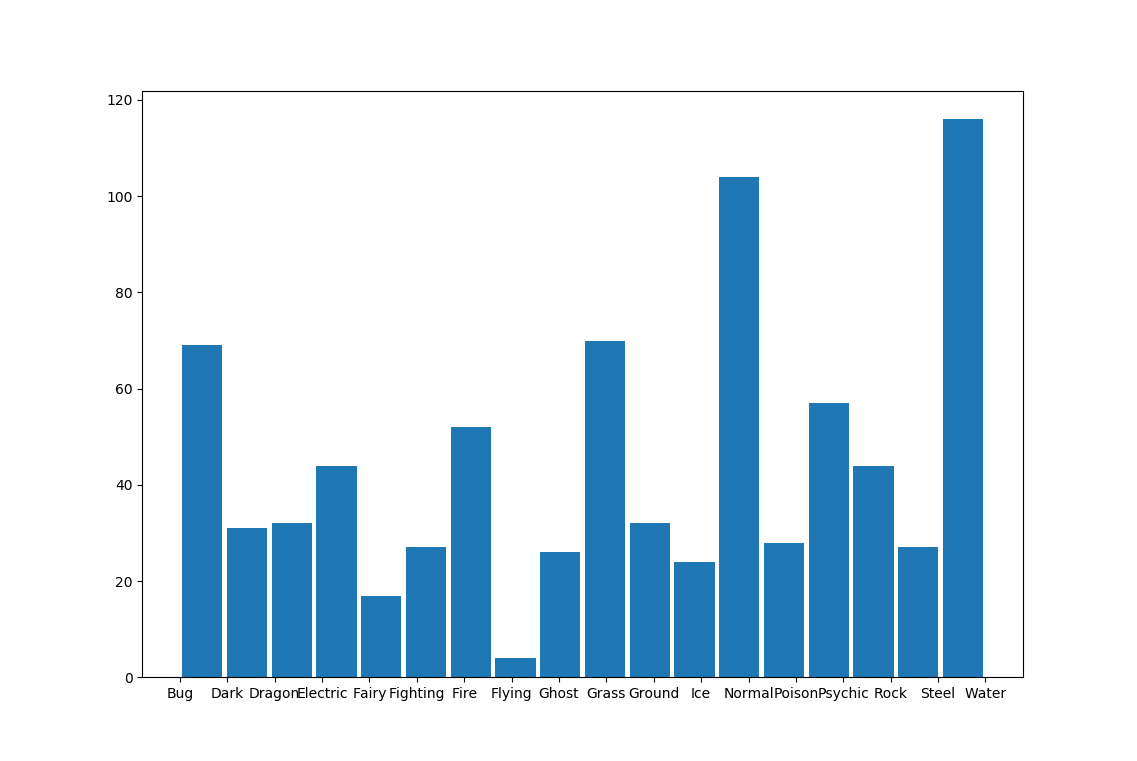

In [135]:
# Histograma que permite a visualização geral da distribuição dos pokémons de acordo com o seu tipo principal (Type 1)
plt.hist(data['Type 1'], rwidth= .9, bins= 18);
plt.rcParams['figure.figsize'] = (15,15)

<IPython.core.display.Javascript object>


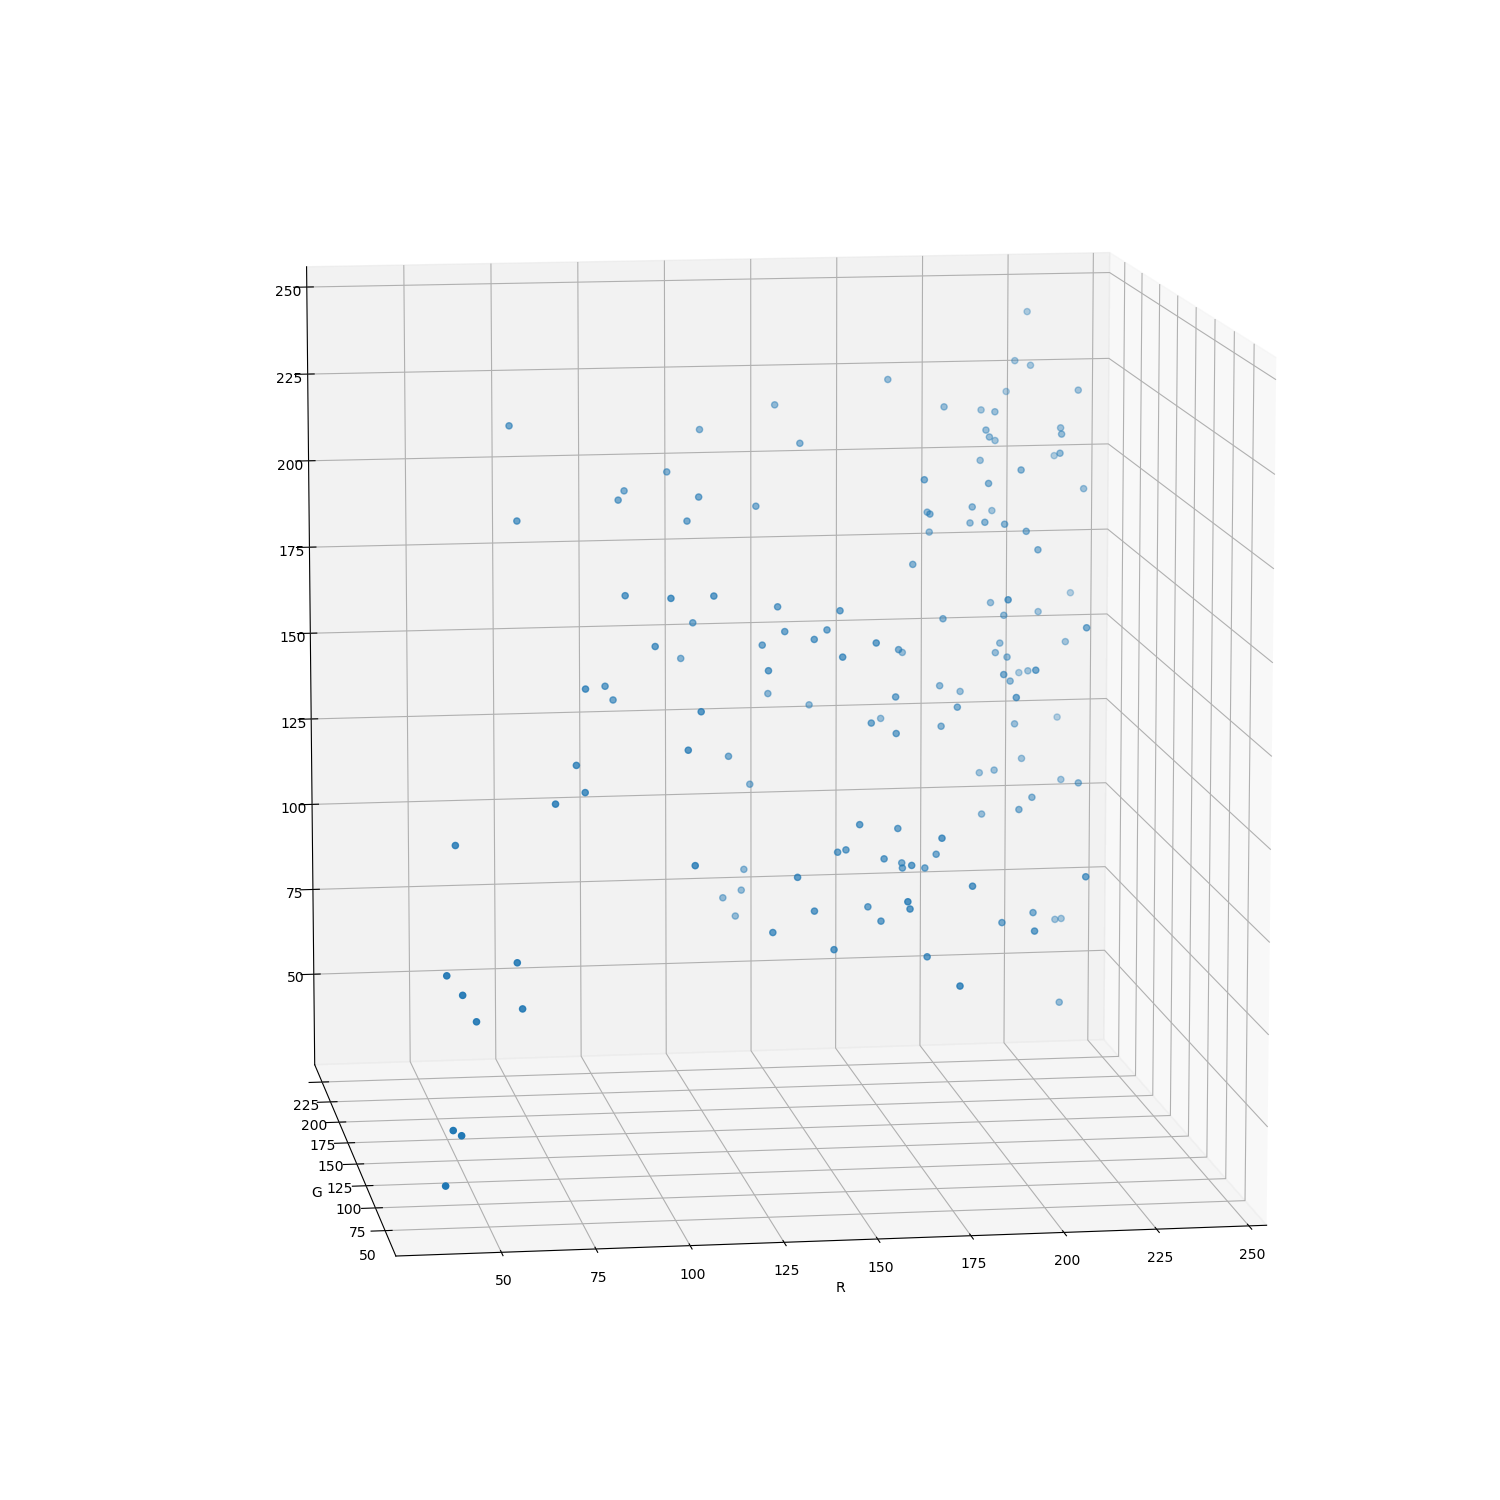

In [136]:
R = [] 
G = []
B = []

for cor in lis_cores_rgb[:150]:
    R.append(cor[0])
    G.append(cor[1])
    B.append(cor[2])

fig = plt.figure()
ax = Axes3D(fig)

valores_x = R
valores_y = G
valores_z = B

ax.scatter(valores_x,valores_y,valores_z)
plt.xlabel('R')
plt.ylabel('G')
plt.show()
#O EIXO Z É O IDH

In [ ]:
data['Type 1'].value_counts()

## Relatório do projeto

### Procedimentos realizados com as bases de dados (imagens + stats)

##### Imagens
##### Stats

### Método de análise utilizado
#### Explicando o K-means

### Verificando a qualidade da classificação em diferentes cenários

#### Código de cores: RGB vs. HSV
#### Com stats e sem stats
#### Com geração e sem geração

##### Fontes:
CSV com dados sobre os Pokémons: https://www.kaggle.com/abcsds/pokemon

Database de fotos: https://www.kaggle.com/kvpratama/pokemon-images-dataset